# Imports

In [1]:
import scikeras

In [2]:
import pandas as pd
import numpy as np
from scikeras.wrappers import KerasRegressor
from tensorflow import keras
import joblib
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go
# import plotly.express as px
# import plotly.offline as pyo

# import plotly.io as pio
# pio.renderers.default='notebook'

import matplotlib.pyplot as plt
# pyo.init_notebook_mode()


ImportError: cannot import name 'effective_n_jobs' from 'joblib' (C:\Users\vmore\anaconda3\envs\deeplearning-labs\lib\site-packages\joblib\__init__.py)

In [ ]:
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# from sklearn.neural_network import MLPRegressor
from sklearn.compose import TransformedTargetRegressor

In [4]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.optimizers import SGD
# from tensorflow.keras.callbacks import ReduceLROnPlateau
# from tensorflow.python.client import device_lib
# import sklearn.metrics as metrics
# from sklearn.preprocessing import StandardScaler
# import h5py

# Cargar datasets

In [4]:
X_train = pd.read_csv('C:/Users/vmore/notebooks/TFM/Modelos eolica/datos/X_train_2y.csv', parse_dates=[0], index_col='datetime_utc')
y_train = pd.read_csv('C:/Users/vmore/notebooks/TFM/Modelos eolica/datos/y_train_2y.csv', parse_dates=[0], index_col='datetime_utc')
X_test = pd.read_csv('C:/Users/vmore/notebooks/TFM/Modelos eolica/datos/X_test.csv', parse_dates=[0], index_col='datetime_utc')
y_test = pd.read_csv('C:/Users/vmore/notebooks/TFM/Modelos eolica/datos/y_test.csv', parse_dates=[0], index_col='datetime_utc')
test_data = pd.read_csv('C:/Users/vmore/notebooks/TFM/Modelos eolica/datos/test_data.csv', parse_dates=[0], index_col='datetime_utc')

# 4. CNN keras

In [6]:
target_shape = (12, 1)

In [7]:
# def get_CNN(hidden_layer_sizes, meta, alpha, n_filters, kernel_size):
#     model = keras.Sequential()
#     model.add(keras.layers.Reshape(target_shape, input_shape=(12,)))
#     model.add(keras.layers.Conv1D(filters=n_filters, kernel_size=kernel_size, activation='relu'))
#     model.add(keras.layers.MaxPooling1D(pool_size=2))
#     model.add(keras.layers.Flatten())
#     for hidden_layer_size in hidden_layer_sizes:
#         layer = keras.layers.Dense(hidden_layer_size, activation="relu", kernel_regularizer=regularizers.L2(alpha),)
#         model.add(layer)       
#     out = keras.layers.Dense(6)
#     model.add(out)
#     return model

In [8]:
# def get_CNN(hidden_layer_sizes, meta, alpha, n_filters, kernel_size):
#     model = keras.Sequential()
#     model.add(keras.layers.Reshape(target_shape, input_shape=(12,)))
#     model.add(keras.layers.Conv1D(filters=n_filters, kernel_size=kernel_size, activation='relu'))
#     model.add(keras.layers.MaxPooling1D(pool_size=2))
#     model.add(keras.layers.Flatten())
#     for hidden_layer_size in hidden_layer_sizes:
#         layer = keras.layers.Dense(hidden_layer_size, activation="relu", kernel_regularizer=regularizers.L2(alpha),)
#         model.add(layer)       
#     out = keras.layers.Dense(6)
#     model.add(out)
#     return model

# cnn = KerasRegressor(
#     model=get_CNN,
#     loss="mean_absolute_error",
#     optimizer='adam',
#     epochs=10000,
#     verbose=0,
#     shuffle=False,
#     batch_size=-1,
# )

# cnn_pipeline = Pipeline(steps=[('std_sc', StandardScaler()),
#                                ('cnn', cnn)])

# y_transformer = StandardScaler()
# inner_estimator = TransformedTargetRegressor(regressor=cnn_pipeline,
#                                              transformer=y_transformer)

# param_grid_CNN = {'regressor__cnn__model__hidden_layer_sizes': [(25,), (50,), (100,), (50,50), (100,100),],
#                   'regressor__cnn__model__n_filters': [2, 4, 8, 16,],
#                   'regressor__cnn__model__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10,],
#                   'regressor__cnn__model__kernel_size': [2, 3, 4, 5],
#                  }

# # TimeSeries Cross validation
# tscv = TimeSeriesSplit(n_splits=2)

# # Create the GridSearchCV object
# grid_search_CNN = GridSearchCV(inner_estimator, param_grid_CNN, cv=tscv, scoring='neg_mean_absolute_error',
#                               n_jobs = 8)

# # Fit the GridSearchCV object to the training data
# grid_search_CNN.fit(X_train, y_train)

In [9]:
def get_CNN(n_conv_layers, alpha, n_filters, kernel_size):
    target_shape = (12, 1)
    input_shape=(12,)
    model = keras.Sequential()
    model.add(keras.layers.Reshape(target_shape, input_shape=input_shape))
    
    for i in range(n_conv_layers):
        model.add(keras.layers.Conv1D(input_shape=target_shape, filters=n_filters, kernel_size=kernel_size, activation='relu', kernel_regularizer=keras.regularizers.L2(alpha),))
        model.add(keras.layers.MaxPooling1D(pool_size=2, padding='same'))
        target_shape=(input_shape[0]-kernel_size+1, n_filters)
        
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(10, activation="relu", kernel_regularizer=keras.regularizers.L2(alpha),))
    model.add(keras.layers.Dense(10, activation="relu", kernel_regularizer=keras.regularizers.L2(alpha),))
    out = keras.layers.Dense(6, kernel_regularizer=keras.regularizers.L2(alpha),)
    model.add(out)
    return model

cnn = KerasRegressor(
    model=get_CNN,
    loss="mean_absolute_error",
    optimizer='adam',
    epochs=12000,
    verbose=0,
    shuffle=False,
    batch_size=200,
)

cnn_pipeline = Pipeline(steps=[('std_sc', StandardScaler()),
                               ('cnn', cnn)])

y_transformer = StandardScaler()
inner_estimator = TransformedTargetRegressor(regressor=cnn_pipeline,
                                             transformer=y_transformer)

param_grid_CNN = {'regressor__cnn__model__n_conv_layers': [1, 2],
                  'regressor__cnn__model__n_filters': [2, 4, 6, 8],
                  'regressor__cnn__model__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1],
                  'regressor__cnn__model__kernel_size': [2, 3, 4, 5],
                 }

# param_grid_CNN = {'regressor__cnn__model__n_conv_layers': [2],
#                   'regressor__cnn__model__n_filters': [4],
#                   'regressor__cnn__model__alpha': [0.0001,],
#                   'regressor__cnn__model__kernel_size': [4,],
#                  }

# TimeSeries Cross validation
tscv = TimeSeriesSplit(n_splits=2)

# Create the GridSearchCV object
grid_search_CNN = GridSearchCV(inner_estimator, param_grid_CNN, cv=tscv, scoring='neg_mean_absolute_error',
                              n_jobs = 5)

# Fit the GridSearchCV object to the training data
grid_search_CNN.fit(X_train, y_train)

C:\Users\vmore\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


40 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vmore\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vmore\anaconda3\lib\site-packages\sklearn\compose\_target.py", line 262, in fit
    self.regressor_.fit(X, y_trans, **fit_params)
  File "C:\Users\vmore\anaconda3\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None),
             estimator=TransformedTargetRegressor(regressor=Pipeline(steps=[('std_sc',
                                                                             StandardScaler()),
                                                                            ('cnn',
                                                                             KerasRegressor(batch_size=-1, epochs=12000, loss='mean_absolute_error', model=<function get_CNN at 0x00000193CA8E9A60>, optimizer='adam', shuffle=False, verbose=0))]),
                                                  transformer=StandardScaler()),
             n_jobs=5,
             param_grid={'regressor__cnn__model__alpha': [1e-05, 0.0001, 0.001,
                                                          0.01, 0.1],
                         'regressor__cnn__model__kernel_size': [2, 3, 4, 5],
                         'regressor__cnn__model__n_conv_layers': [1, 2],
                         'regressor__cnn__model__n_filters': [2, 4, 6, 8]},
             scoring='neg_mean_absolute_error')

### Training

In [10]:
best_CNN_score = grid_search_CNN.best_score_
best_CNN_model = grid_search_CNN.best_estimator_

In [11]:
best_CNN_model.regressor_.named_steps['cnn'].model_.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 12, 1)             0         
                                                                 
 conv1d (Conv1D)             (None, 9, 8)              40        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 5, 8)             0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 40)                0         
                                                                 
 dense (Dense)               (None, 10)                410       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                        

In [12]:
grid_search_CNN.best_params_

{'regressor__cnn__model__alpha': 0.0001,
 'regressor__cnn__model__kernel_size': 4,
 'regressor__cnn__model__n_conv_layers': 1,
 'regressor__cnn__model__n_filters': 8}

In [13]:
best_CNN_model

TransformedTargetRegressor(regressor=Pipeline(steps=[('std_sc',
                                                      StandardScaler()),
                                                     ('cnn',
                                                      KerasRegressor(batch_size=-1, epochs=12000, loss='mean_absolute_error', model=<function get_CNN at 0x00000193CA8E9A60>, model__alpha=0.0001, model__kernel_size=4, model__n_conv_layers=1, model__n_filters=8, optimizer='adam', shuffle=False, verbose=0))]),
                           transformer=StandardScaler())

In [14]:
# best_MLP_model.regressor_.named_steps['mlp'].history_

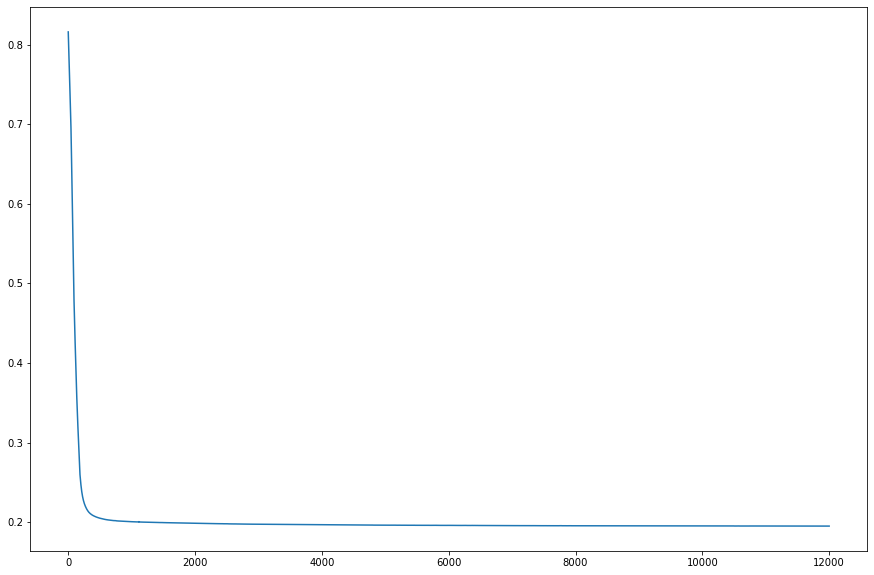

In [15]:
plt.figure(figsize=(15,10))
plt.plot(best_CNN_model.regressor_.named_steps['cnn'].history_['loss'])
# dir(best_MLP_model.regressor_.named_steps['mlp'].history_.values)

### Forecasting

In [16]:
y_pred_CNN = best_CNN_model.predict(X_test)

In [17]:
df_y_pred_CNN = pd.DataFrame(y_pred_CNN, columns=['t+1', 't+2', 't+3', 't+4', 't+5', 't+6'])
df_y_pred_CNN

,t+1,t+2,t+3,t+4,t+5,t+6
0,0.144056,0.134315,0.126401,0.120939,0.117577,0.116076
1,0.141696,0.136717,0.132824,0.130682,0.129808,0.130212
2,0.139401,0.136686,0.134737,0.134336,0.134723,0.136074
3,0.181563,0.192641,0.201201,0.208531,0.213214,0.216540
4,0.176129,0.186033,0.194985,0.203486,0.208912,0.212911
...,...,...,...,...,...,...
8737,0.220080,0.226273,0.231395,0.234574,0.233722,0.230931
8738,0.219168,0.218877,0.218002,0.216220,0.212013,0.206932
8739,0.241886,0.244753,0.245888,0.246332,0.244173,0.240978
8740,0.324230,0.345254,0.357092,0.363697,0.365703,0.364265


In [18]:
MAE_CNN_t1=metrics.mean_absolute_error(y_test['(t+1)'], df_y_pred_CNN['t+1'])
MAE_CNN_t2=metrics.mean_absolute_error(y_test['(t+2)'], df_y_pred_CNN['t+2'])
MAE_CNN_t3=metrics.mean_absolute_error(y_test['(t+3)'], df_y_pred_CNN['t+3'])
MAE_CNN_t4=metrics.mean_absolute_error(y_test['(t+4)'], df_y_pred_CNN['t+4'])
MAE_CNN_t5=metrics.mean_absolute_error(y_test['(t+5)'], df_y_pred_CNN['t+5'])
MAE_CNN_t6=metrics.mean_absolute_error(y_test['(t+6)'], df_y_pred_CNN['t+6'])

In [19]:
print('MAE en t+1: {:2.2%}'.format(MAE_CNN_t1))
print('MAE en t+2: {:2.2%}'.format(MAE_CNN_t2))
print('MAE en t+3: {:2.2%}'.format(MAE_CNN_t3))
print('MAE en t+4: {:2.2%}'.format(MAE_CNN_t4))
print('MAE en t+5: {:2.2%}'.format(MAE_CNN_t5))
print('MAE en t+6: {:2.2%}'.format(MAE_CNN_t6))

MAE en t+1: 0.83%
MAE en t+2: 1.68%
MAE en t+3: 2.49%
MAE en t+4: 3.25%
MAE en t+5: 3.94%
MAE en t+6: 4.58%


### old version ###
{'regressor__cnn__model__hidden_layer_sizes': (25,),
 'regressor__cnn__model__kernel_size': 3,
 'regressor__cnn__model__n_filters': 4}
 
MAE en t+1: 0.86%
MAE en t+2: 1.71%
MAE en t+3: 2.52%
MAE en t+4: 3.29%
MAE en t+5: 3.99%
MAE en t+6: 4.62%

### previous v2 ###
{'regressor__cnn__model__alpha': 0.0001,
 'regressor__cnn__model__kernel_size': 3,
 'regressor__cnn__model__n_conv_layers': 1,
 'regressor__cnn__model__n_filters': 4}
 
MAE en t+1: 0.88%
MAE en t+2: 1.72%
MAE en t+3: 2.53%
MAE en t+4: 3.28%
MAE en t+5: 3.97%
MAE en t+6: 4.59%

# Guardar el modelo

In [20]:
# best_MLP_model.regressor_.named_steps['mlp'].model_.save('modelos/MLP_scikeras_model.h5')
# joblib.dump(best_CNN_model, "modelos/CNN_scikeras_model2.joblib")

# Cargar el modelo

In [9]:
!pip show joblib

Name: joblib
Version: 1.1.1
Summary: Lightweight pipelining with Python functions
Home-page: https://joblib.readthedocs.io
Author: Gael Varoquaux
Author-email: gael.varoquaux@normalesup.org
License: BSD
Location: c:\users\vmore\anaconda3\envs\deeplearning-labs\lib\site-packages
Requires: 
Required-by: sacremoses, scikit-learn, scikit-optimize


In [10]:
!pip uninstall joblib

^C


In [12]:
# loaded_MLP = keras.models.load_model('modelos/MLP_scikeras_model.h5')
loaded_MLP = joblib.load("modelos/CNN_scikeras_model2.joblib")

AttributeError: Can't get attribute 'get_CNN' on <module '__main__'>

In [22]:
# plt.figure(figsize=(15,10))
# plt.plot(loaded_MLP.regressor_.named_steps['cnn'].history_['loss'][9000:])

In [6]:
y_pred_MLP_loaded = loaded_MLP.predict(X_test)

NameError: name 'loaded_MLP' is not defined

In [24]:
# y_pred_MLP_loaded

In [25]:
# loaded_MLP.summary()